# Data Visualisation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


In [4]:
df = pd.read_csv('imbalanced_self_aware_data.csv')
df.head()

,respiratory_rate,blood_oxygen,blood_sugar,systolic_bp,diastolic_bp,heart_rate,class
0,21.20,93.95,140.35,130.51,57.17,63.57,0
1,21.65,93.78,137.90,128.30,57.11,98.43,0
2,21.59,93.65,142.45,127.64,58.28,99.21,0
3,21.77,93.44,140.45,126.50,58.84,72.77,0
4,21.35,94.01,137.66,130.67,58.10,85.45,0


In [5]:
df.shape

(6500, 7)

In [6]:
df.describe()

,respiratory_rate,blood_oxygen,blood_sugar,systolic_bp,diastolic_bp,heart_rate,class
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,20.051162,97.739678,103.619894,120.920971,56.336662,87.278817,2.353846
std,5.239401,4.979031,33.556860,21.393841,2.636388,30.141786,1.461732
min,10.800000,90.920000,64.010000,81.000000,48.000000,40.010000,0.000000
25%,21.040000,93.640000,73.260000,126.220000,54.920000,62.460000,1.000000
50%,21.580000,94.640000,75.610000,128.870000,56.735000,84.110000,3.000000
75%,22.660000,103.260000,139.452500,131.640000,58.370000,109.980000,4.000000
max,30.000000,105.000000,143.000000,156.000000,60.000000,149.990000,4.000000


Text(0.5, 23.38159722222222, '')

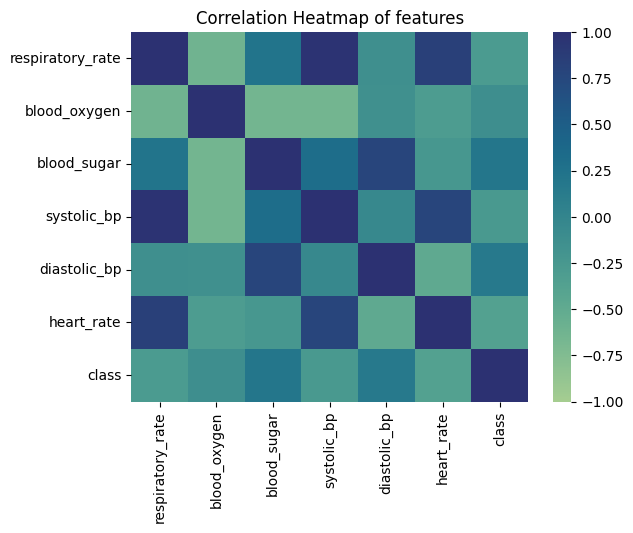

In [7]:
ax = sns.heatmap(
    data=df.corr(),
    cmap="crest",
    vmin=-1,

)
ax.set_title("Correlation Heatmap of features")
ax.set_xlabel(ax.get_xlabel(), rotation=15)

<Axes: title={'center': 'Class distribution of dataset'}>

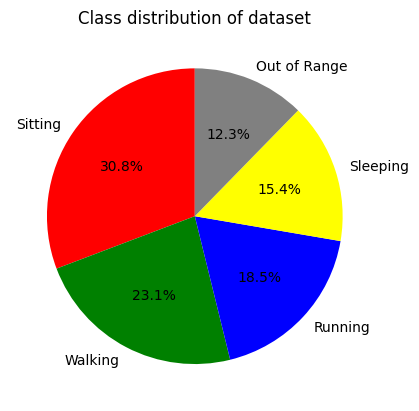

In [10]:
df['class'].value_counts().plot(kind='pie', startangle=90, autopct='%.1f%%', ylabel='', title='Class distribution of dataset', labels=['Sitting', 'Walking', 'Running', 'Sleeping', 'Out of Range'], colors=['red', 'green', 'blue', 'yellow', 'gray'])


In [11]:
from imblearn.combine import SMOTEENN
X = df.drop('class', axis=1)
y = df['class']

smote_enn = SMOTEENN(sampling_strategy='auto')
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
df = pd.concat([X_resampled, y_resampled], axis=1)

<Axes: title={'center': 'Updated class distribution of dataset'}>

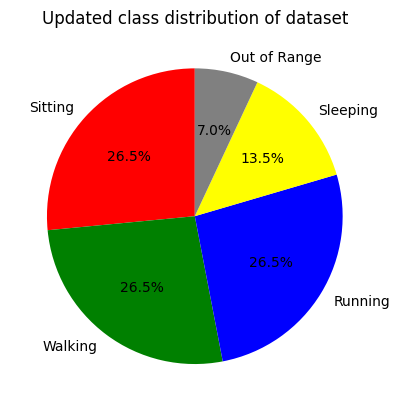

In [13]:
df['class'].value_counts().plot(kind='pie', startangle=90, autopct='%.1f%%', ylabel='', title='Updated class distribution of dataset', labels=['Sitting', 'Walking', 'Running', 'Sleeping', 'Out of Range'], colors=['red', 'green', 'blue','yellow','gray'])


Text(0.5, 0.98, 'Kernel Density Estimate (KDE) Plots for each feature by class label')

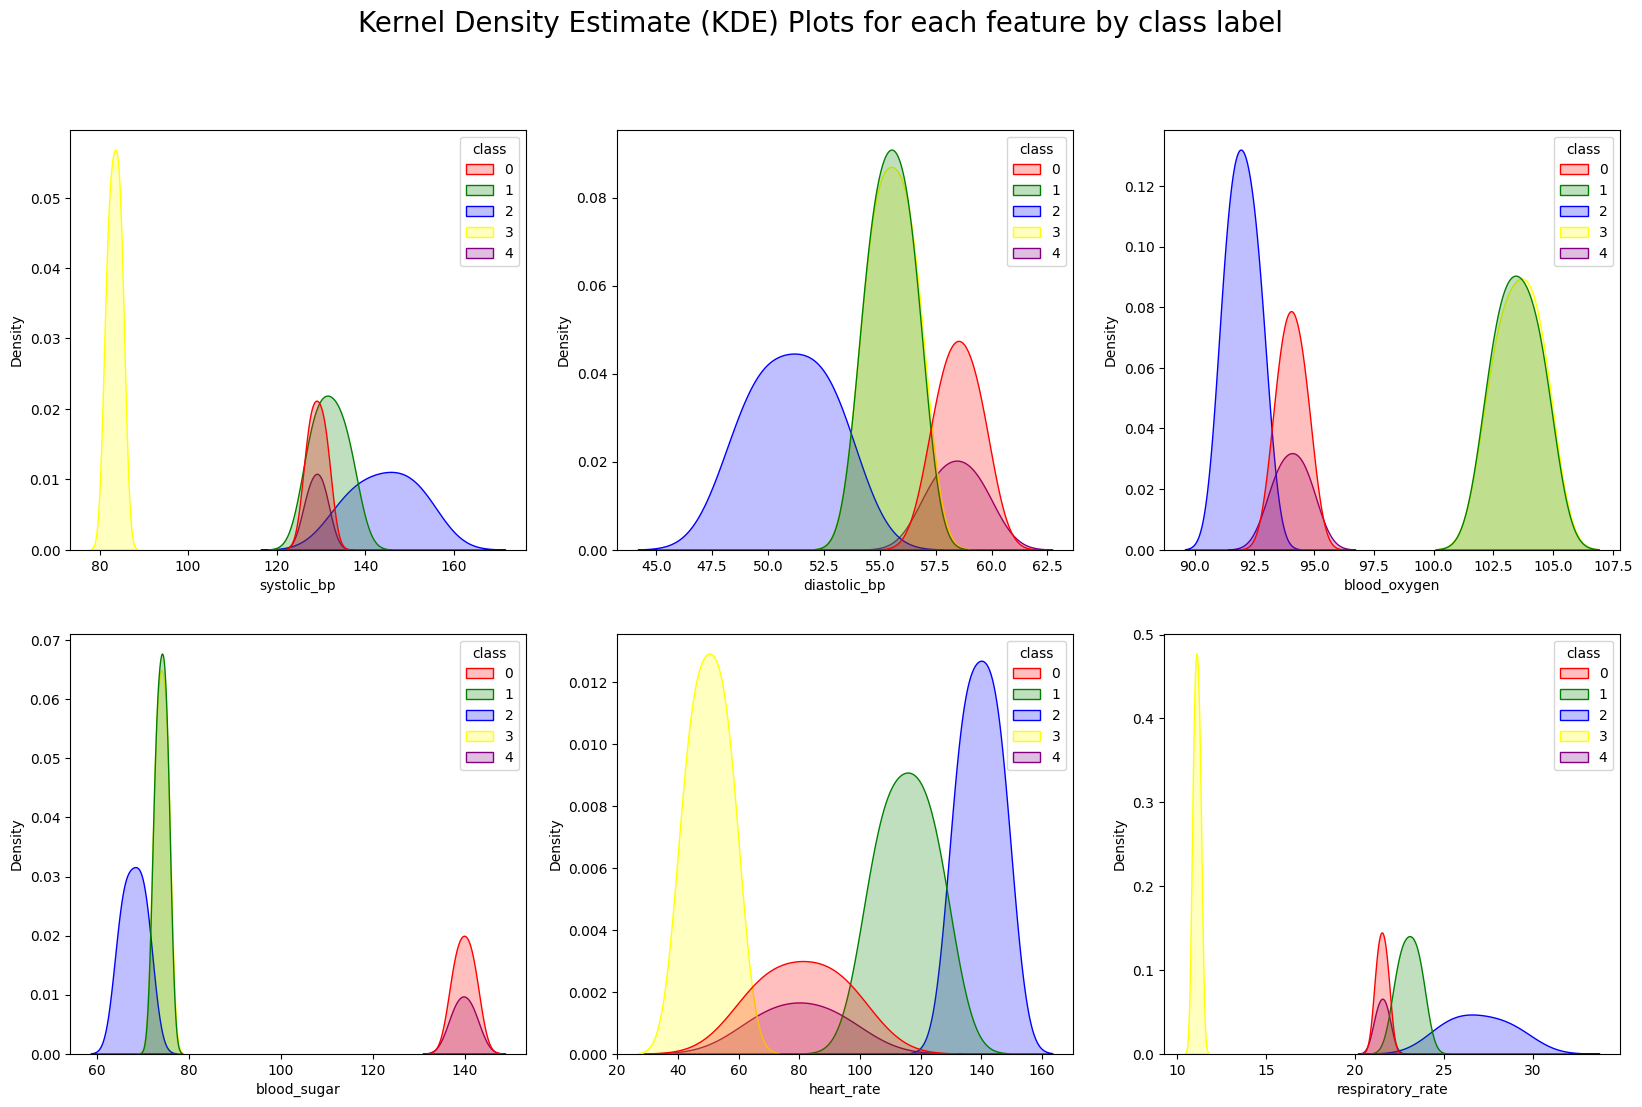

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette for the 5 classes
custom_palette = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'purple'}

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
sns.kdeplot(data=df, x='systolic_bp', hue='class', fill=True, bw_adjust=3.5, ax=axes[0, 0], palette=custom_palette)
sns.kdeplot(data=df, x='diastolic_bp', hue='class', fill=True, bw_adjust=3.5, ax=axes[0, 1], palette=custom_palette)
sns.kdeplot(data=df, x='blood_oxygen', hue='class', fill=True, bw_adjust=3.5, ax=axes[0, 2], palette=custom_palette)
sns.kdeplot(data=df, x='blood_sugar', hue='class', fill=True, bw_adjust=3.5, ax=axes[1, 0], palette=custom_palette)
sns.kdeplot(data=df, x='heart_rate', hue='class', fill=True, bw_adjust=3.5, ax=axes[1, 1], palette=custom_palette)
sns.kdeplot(data=df, x='respiratory_rate', hue='class', fill=True, bw_adjust=3.5, ax=axes[1, 2], palette=custom_palette)

plt.suptitle('Kernel Density Estimate (KDE) Plots for each feature by class label', fontsize=20)
